# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats

sns.set()

%matplotlib inline
pd.options.display.max_colwidth = 600

## Gathering Data

**Twitter Archive**

In [2]:
#reading csv as pandas dataframe
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


**Image Prediction Data**

In [4]:
#using requests library to download the tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [5]:
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Tweets Data**

In [7]:
#using the json file downloaded from the Udacity Server and reading the json file into a pandas dataframe

df_3 = pd.read_json('tweet-json.txt', lines = True)

In [8]:
df_3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, '...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resiz...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, '...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUn

#Steps taken from Udacity's server for getting data from twitter API

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

**Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
**These are hidden to comply with Twitter's API terms and conditions**

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

**Query Twitter's API for JSON data for each tweet ID in the Twitter archive**

count = 0
fails_dict = {}
start = timer()


**Save each tweet's returned JSON as a new line in a .txt file**


with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


**We have gathered three dataframes**

df_1 = contains data from the provided csv

df_2 = contains data on images from the tsv file

df_3 = contains data obtained from twitter handles using the json file provided by Udacity

## Assessing Data

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2086,670803562457407488,NaN,NaN,2015-11-29 03:16:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670803562457407488/photo/1,10,10,None,None,None,None,None
377,828011680017821696,NaN,NaN,2017-02-04 22:45:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Brutus and Jersey. They think they're the same size. Best furiends furever. Both 11/10 would pet simultaneously https://t.co/rkhCFfDtxB,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828011680017821696/photo/1,https://twitter.com/dog_rates/status/828011680017821696/photo/1",11,10,Brutus,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a heartwarming scene of a single father raising his two pups. Downright awe-inspiring af. 12/10 for everyone https://…,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,"https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1",12,10,None,None,None,None,None
401,824663926340194305,NaN,NaN,2017-01-26 17:02:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wilson. Named after the volleyball. He tongue wrestled a bee and lost. 13/10 valiant effort tho https://t.co/A5Mx4h1FSM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824663926340194305/photo/1,13,10,Wilson,None,None,None,None
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Gizmo. He's upset because he's not sure if he's really big or the shopping cart is really small. 7/10 https://t.co/XkMtCGhr4a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672068090318987265/photo/1,7,10,Gizmo,None,None,None,None


In [11]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1172,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True
530,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,rain_barrel,0.625555,False,barrel,0.138383,False,Labrador_retriever,0.039465,True
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True
1059,714982300363173890,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,0.944376,True,beagle,0.025435,True,Ibizan_hound,0.009962,True
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True


In [14]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [16]:
df_3.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
226,2017-04-02 00:03:26+00:00,848324959059550208,848324959059550208,Meet Odin. He's supposed to be giving directions but he'd rather look at u like that. Should probably buckle pup. 12/10 distracting as h*ck https://t.co/1pSqUbLQ5Z,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 848324954202439680, 'id_str': '848324954202439680', 'indices': [140, 163], 'media_url': 'http://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg', 'url': 'https://t.co/1pSqUbLQ5Z', 'display_url': 'pic.twitter.com/1pSqUbLQ5Z', 'expanded_url': 'https://twitter.com/dog_rates/status/848324959059550208/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 675, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150,...","{'media': [{'id': 848324954202439680, 'id_str': '848324954202439680', 'indices': [140, 163], 'media_url': 'http://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg', 'url': 'https://t.co/1pSqUbLQ5Z', 'display_url': 'pic.twitter.com/1pSqUbLQ5Z', 'expanded_url': 'https://twitter.com/dog_rates/status/848324959059550208/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 675, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1152, 'h': 2048, 'r...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,20229,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1414,2016-02-13 22:29:29+00:00,698635131305795584,698635131305795584,Here we are witnessing five Guatemalan Birch Floofs in their natural habitat. All 12/10 (Vid by @pootdanielle) https://t.co/rb8nzVNh7F,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'pootdanielle', 'name': 'Dagnelle', 'id': 380031561, 'id_str': '380031561', 'indices': [96, 109]}], 'urls': [], 'media': [{'id': 698635005506015234, 'id_str': '698635005506015234', 'indices': [111, 134], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/698635005506015234/pu/img/wQ4yFXTZ-2QLt68b.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/698635005506015234/pu/img/wQ4yFXTZ-2QLt68b.jpg', 'url': 'https://t.co/rb8nzVNh7F', 'display_url': 'pic.twitter.com/rb8nzVNh7F', 'expanded_url': 'https://twitter.c...","{'media': [{'id': 698635005506015234, 'id_str': '698635005506015234', 'indices': [111, 134], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/698635005506015234/pu/img/wQ4yFXTZ-2QLt68b.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/698635005506015234/pu/img/wQ4yFXTZ-2QLt68b.jpg', 'url': 'https://t.co/rb8nzVNh7F', 'display_url': 'pic.twitter.com/rb8nzVNh7F', 'expanded_url': 'https://twitter.com/dog_rates/status/698635131305795584/video/1', 'type': 'video', 'sizes': {'medium': {'w': 480, 'h': 272, 'resize': 'fit'}, 'large': {'w': 480, 'h': 272, 'resize': 'fit'}, 'thu...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,1400,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1503,2016-01-26 01:21:31+00:00,691793053716221953,691793053716221952,We usually don't rate penguins but this one is in need of a confidence boost after that slide. 10/10 https://t.co/qnMJHBxPuo,False,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/qnMJHBxPuo', 'expanded_url': 'https://vine.co/v/OTTVAKw6YlW', 'display_url': 'vine.co/v/OTTVAKw6YlW', 'indices': [101, 124]}]}",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",NaN,...,8910,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
356,2017-0

In [17]:
df_3.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


## Identifying Quality Issues (QI)

**df_1**

1. retweeted_status_timestamp, timestamp should be datetime instead of object (string)

2. tweet_id is int

3. text column has urls

4. incorrect names or missing names in the name column

5. source column is not clean

6. rows with retweets need to be removed




**df_2**

6. tweet_id is int




**df_3**

7. id_str should be renamed to tweet_id

8. id_str is int 


## Identifying Tidiness Issues (TI)

1. df_1 removing retweet related columns

2. df_1 doesn't need rewteeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id

3. df_1 doggo, floofer, puppo, pupper columns can be melted into one life_stages column

4. df_2 columns p1, p2, p3 can be made into one column

5. df_2 doesn't need p1_dog, p2_dog and p3_dog, p1_conf, p2_conf, p3_conf columns

6. df_3 only needs tweet_id and retweet_count and favorite_count

7. all three dfs can be merged into one 


**Making Copies of dataframes**

In [18]:
df_1 = df_1.copy()

In [19]:
df_2 = df_2.copy()

In [20]:
df_3 = df_3.copy()

# Cleaning Data

**df_1**

**DEFINE**

Quality Issue (QI)1. df_1 timestamp should be datetime 

**CODE**

In [21]:
df_1['timestamp'] = pd.to_datetime(df_1.timestamp)

**DEFINE**

QI2. change tweet_id to object 

**CODE**

In [22]:
df_1['tweet_id'] = df_1['tweet_id'].apply(str)

In [23]:
#no duplicated values in tweet_id
sum(df_1.tweet_id.duplicated())

0

**TEST**

In [24]:
#test
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**DEFINE**

QI3. df_1 column text: has urls along with text.

**CODE**

In [25]:
df_1['text'] = df_1['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

**TEST**

In [26]:

len(df_1[df_1.text.str.contains(r"(\d+\.d*\/\d+)")])

C:\Users\Maheen\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0

**TEST**

In [27]:
df_1['text'].sample(3)

758                                          RIP Loki. Thank you for the good times. You will be missed by many. 14/10 
1282                               This is Coco. She gets to stay on the Bachelor for another week. Super pumped 11/10 
1880    Say hello to Mollie. This pic was taken after she bet all her toys on Ronda Rousey. 10/10 hang in there pupper 
Name: text, dtype: object

**DEFINE**

QI4. changing none values to NAN in dog types, also a values will also be made nan. 

**CODE**

In [28]:
df_1['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Jiminus      1
Mimosa       1
Jerome       1
Mike         1
Gabby        1
Name: name, Length: 957, dtype: int64

In [29]:
df_1.name.replace("a", np.nan, inplace = True)
df_1.name.replace("an", np.nan, inplace = True)
df_1.name.replace("the", np.nan, inplace = True)
df_1.name.replace("just", np.nan, inplace = True)
df_1.name.replace("None", np.nan, inplace = True)

**TEST**

In [30]:

df_1['name'].value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Lola       10
           ..
Swagger     1
Rueben      1
Tupawc      1
Walker      1
Gabby       1
Name: name, Length: 952, dtype: int64

**DEFINE**

The source column has extra symbols which can be removed 

**CODE**

In [31]:
#QI5. cleaning the source column 

df_1['source'] = df_1['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**TEST**

In [32]:

df_1['source'].sample(3)

1377     Twitter for iPhone
1299    Vine - Make a Scene
1802     Twitter for iPhone
Name: source, dtype: object

**DEFINE**

There are some rows which are retweets which are not needed for the analysis.


**CODE**

In [33]:
#QI6. dropping rows with retweets

df_1 = df_1[df_1.retweeted_status_id.isnull()]
df_1 = df_1[df_1.retweeted_status_user_id.isnull()]
df_1 = df_1[df_1.retweeted_status_timestamp.isnull()]

**TEST**

In [34]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

**DEFINE**

Removing empty columns


**CODE**

In [35]:
#TI.1 Removing retweet related columns

df_1 = df_1.drop('retweeted_status_id', 1)
df_1 = df_1.drop('retweeted_status_user_id', 1)
df_1 = df_1.drop('retweeted_status_timestamp', 1)

**TEST**

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1423 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

**DEFINE**

The four columns of life stage can be merged into one. 

**CODE**

In [37]:
#TI2 melting doggo, puppo, floofer, pupper columns into one life_stage column
df_1 = pd.melt(df_1, 
               id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                           value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
              var_name = 'stages', value_name = 'life_stage')


In [38]:
df_1.drop('stages', axis=1, inplace = True)

**TEST**

In [39]:

df_1.life_stage.value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: life_stage, dtype: int64

In [40]:
len(df_1[df_1.duplicated()])

6169

**DEFINE**

Removing duplicates

**CODE**

In [41]:

df_1 = df_1.drop_duplicates()

**TEST**

In [42]:

df_1.life_stage.value_counts()

None       2175
pupper      234
doggo        87
puppo        25
floofer      10
Name: life_stage, dtype: int64

**df_2**

**DEFINE**

Changing tweet id to object

**CODE**

In [43]:

df_2['tweet_id'] = df_2['tweet_id'].apply(str)

**TEST**

In [44]:

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**DEFINE**

Making one column for dog breeds

**CODE**

In [45]:
#TI3 make one column for dog breeds using p1, p2, p3

dog_breeds = []


def get_dog_breeds(df_2):
    if df_2['p1_dog'] ==True:
        dog_breeds.append(df_2['p1'])
    elif df_2['p2_dog'] == True:
        dog_breeds.append(df_2['p2'])
    elif df_2['p3_dog'] == True:
        dog_breeds.append(df_2['p3'])
    else:
        dog_breeds.append('NaN')
        
df_2.apply(get_dog_breeds, axis = 1)
df_2['dog_breeds'] = dog_breeds

In [46]:
#TI4 dropping the confidence and true/false columns

df_2.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

**TEST**

In [47]:
#test
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2075 non-null   object
 1   jpg_url     2075 non-null   object
 2   img_num     2075 non-null   int64 
 3   dog_breeds  2075 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


**df_3**

**DEFINE**

QI7 changing column name for consistency

**CODE**

In [48]:
df_3 = df_3.rename(columns = {'id_str':'tweet_id'})

#TEST
df_3.sample(3)

,created_at,id,tweet_id,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
605,2016-11-15 01:44:00+00:00,798340744599797760,798340744599797760,RT @dog_rates: This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would introduce to mom https://t.co/E6bGWf9EOm,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™ (author)', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 771770449999097856, 'id_str': '771770449999097856', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg', 'url': 'https://t.co/E6bGWf9EOm', 'display_url': 'pic.twitter.com/E6bGWf9EOm', 'expanded_url': 'https://twitter.com/dog_rates/status/771770456517009408/photo/1', 'type': 'photo', 'size...","{'media': [{'id': 771770449999097856, 'id_str': '771770449999097856', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg', 'url': 'https://t.co/E6bGWf9EOm', 'display_url': 'pic.twitter.com/E6bGWf9EOm', 'expanded_url': 'https://twitter.com/dog_rates/status/771770456517009408/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 996, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 564, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1024, 'h': 1234, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 're...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,0,False,False,0.0,0.0,en,"{'created_at': 'Fri Sep 02 18:03:10 +0000 2016', 'id': 771770456517009408, 'id_str': '771770456517009408', 'full_text': 'This is Davey. He'll have your daughter home by 8. Just a stand up pup. 11/10 would introduce to mom https://t.co/E6bGWf9EOm', 'truncated': False, 'display_text_range': [0, 100], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 771770449999097856, 'id_str': '771770449999097856', 'indices': [101, 124], 'media_url': 'http://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrXhIqBW8AA6Bse....",NaN,NaN,NaN
2342,2015-11-16 01:52:02+00:00,666071193221509120,666071193221509120,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666071190449033216, 'id_str': '666071190449033216', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg', 'url': 'https://t.co/ZoL8kq2XFx', 'display_url': 'pic.twitter.com/ZoL8kq2XFx', 'expanded_url': 'https://twitter.com/dog_rates/status/666071193221509120/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 577, 'h': 1024, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 340...","{'media': [{'id': 666071190449033216, 'id_str': '666071190449033216', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg', 'url': 'https://t.co/ZoL8kq2XFx', 'display_url': 'pic.twitter.com/ZoL8kq2XFx', 'expanded_url': 'https://twitter.com/dog_rates/status/666071193221509120/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 577, 'h': 1024, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 340, 'h': 603, 'resize': 'fit'}, 'large': {'w': 577, 'h': 1024, 're...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,154,False,False,0.0,0.0,en,Na

**DEFINE**

#QI8 change tweet_id to object

**CODE**

In [49]:

df_3['tweet_id'] = df_3['tweet_id'].apply(str)

**DEFINE**

TI5 dropping columns not needed


**CODE**

In [50]:

df_3.drop(['created_at', 'id', 'full_text', 'truncated', 'extended_entities', 'display_text_range', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweeted_status', 'quoted_status_id', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'retweeted', 'favorited'], axis=1, inplace =True)

**TEST**

In [51]:

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## TI6 - Merging All Three dfs into One

In [52]:
#merging all three dfs
df = pd.merge(df_1, df_2, on = 'tweet_id', how = 'inner')

In [53]:
df = pd.merge(df, df_3, on = 'tweet_id', how = 'inner')

In [54]:
df.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage,jpg_url,img_num,dog_breeds,retweet_count,favorite_count
468,758828659922702336,2016-07-29 00:57:05+00:00,Twitter for iPhone,This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af,https://twitter.com/dog_rates/status/758828659922702336/photo/1,13,10,NaN,None,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,4376,12376
1299,671390180817915904,2015-11-30 18:07:47+00:00,Twitter for iPhone,Striped dog here. Having fun playing on back. Sturdy paws. Looks like an organized Dalmatian. 7/10 would still pet,https://twitter.com/dog_rates/status/671390180817915904/photo/1,7,10,NaN,None,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,NaN,805,1513
1309,671138694582165504,2015-11-30 01:28:28+00:00,Twitter for iPhone,Me running from commitment. 10/10,https://twitter.com/dog_rates/status/671138694582165504/photo/1,10,10,NaN,None,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,1,Samoyed,448,996
460,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,2173,6620
933,689143371370250240,2016-01-18 17:52:38+00:00,Twitter for iPhone,Meet Trip. He likes wearing costumes that aren't consistent with the season to screw with people 10/10 tricky pupper,https://twitter.com/dog_rates/status/689143371370250240/photo/1,10,10,Trip,pupper,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,English_springer,579,2232
1305,671182547775299584,2015-11-30 04:22:44+00:00,Twitter for iPhone,This pup holds the secrets of the universe in his left eye. 12/10,https://twitter.com/dog_rates/status/671182547775299584/photo/1,12,10,NaN,None,https://pbs.twimg.com/media/CVCE9uYXIAEtSzR.jpg,1,Rottweiler,378,1193
146,840370681858686976,2017-03-11 01:15:58+00:00,Twitter for iPhone,You have been visited by the magical sugar jar puggo. He has granted you three boops. 13/10 would use immediately,https://twitter.com/dog_rates/status/840370681858686976/photo/1,13,10,NaN,None,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,NaN,5146,17918
1503,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10,https://twitter.com/dog_rates/status/666102155909144576/photo/1,11,10,NaN,None,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,16,81
824,700062718104104960,2016-02-17 21:02:13+00:00,Twitter for iPhone,This is Eazy-E. He's colorful af. Must be rare. Submerged in Sprite (rad). Doesn't perform well when not wet. 6/10,https://twitter.com/dog_rates/status/700062718104104960/photo/1,6,10,Eazy,None,https://pbs.twimg.com/media/CbcfUxoUAAAlHGK.jpg,1,NaN,778,2890
1226,673359818736984064,2015-12-06 04:34:25+00:00,Twitter for iPhone,This is Steve. He was just relaxing in hot tub when he was intruded upon. 8/10 poor little pup,https://twitter.com/dog_rates/status/673359818736984064/photo/1,8,10,Steve,None,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,728,1558


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1512 non-null   object             
 1   timestamp           1512 non-null   datetime64[ns, UTC]
 2   source              1512 non-null   object             
 3   text                1512 non-null   object             
 4   expanded_urls       1512 non-null   object             
 5   rating_numerator    1512 non-null   int64              
 6   rating_denominator  1512 non-null   int64              
 7   name                1004 non-null   object             
 8   life_stage          1512 non-null   object             
 9   jpg_url             1512 non-null   object             
 10  img_num             1512 non-null   int64              
 11  dog_breeds          1512 non-null   object             
 12  retweet_count       1512 non-null 

## Storing the Cleaned Data into a File

In [56]:
df.to_csv('df_twitter_master.csv', encoding = 'utf-8', index = False)

# Data Analysis and Visualization

## Finding Possible Correlations

In [57]:
df.corr()

,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
rating_numerator,1.000000,0.174856,-0.003556,0.014381,0.007355
rating_denominator,0.174856,1.000000,-0.002857,-0.020325,-0.028287
img_num,-0.003556,-0.002857,1.000000,0.104383,0.131753
retweet_count,0.014381,-0.020325,0.104383,1.000000,0.920884
favorite_count,0.007355,-0.028287,0.131753,0.920884,1.000000


**Using a heatmap to visualize the above**

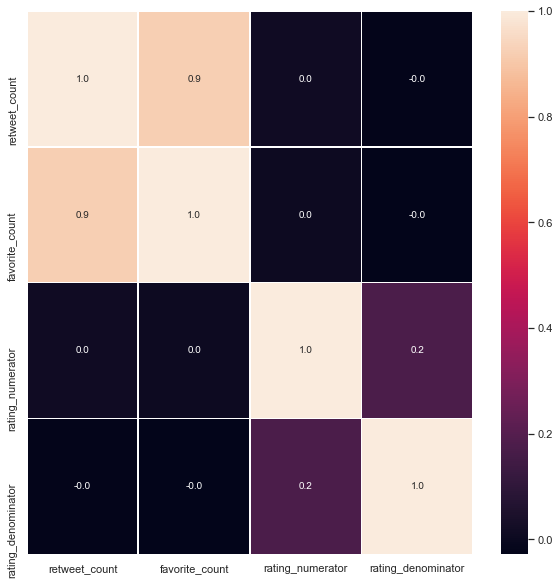

In [58]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].corr(), annot =True, linewidths = .8, fmt = '.1f', ax=ax);


**It can be seen that retweet count and favorite count are highly correlated but neither are correlated with ratings**

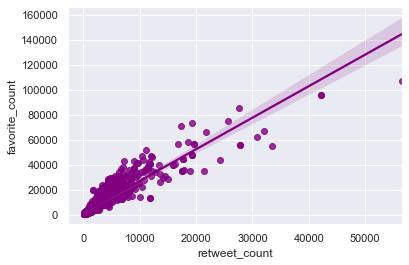

In [59]:
#using a scatterplot to show the correlation between retweet count and favorite count.

sns.regplot(x = "retweet_count", y = "favorite_count", data = df, color = 'purple');

**The two are highly positively correlated.**

## Identifying the Most Popular Dog Breeds

In [60]:
popular_breeds = df[df['dog_breeds'] != "NaN"].dog_breeds.value_counts().nlargest(10)
popular_breeds

golden_retriever      136
Pembroke               81
Labrador_retriever     77
Chihuahua              62
pug                    53
Pomeranian             33
cocker_spaniel         29
chow                   28
toy_poodle             27
French_bulldog         25
Name: dog_breeds, dtype: int64

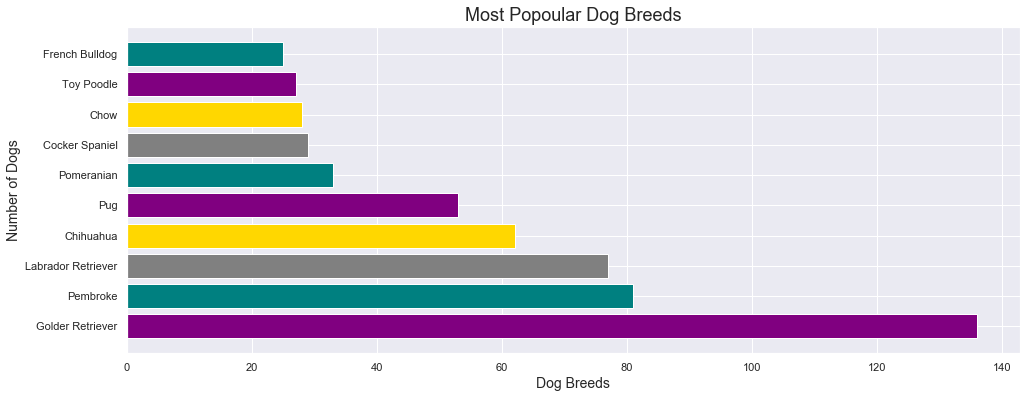

In [79]:
bar, ax = plt.subplots(figsize = (16,6))
labels = ['Golder Retriever', 'Pembroke', 'Labrador Retriever', 'Chihuahua', 'Pug', 'Pomeranian', 'Cocker Spaniel', 'Chow', 'Toy Poodle', 'French Bulldog']
plt.title('Most Popoular Dog Breeds', fontsize='18')
plt.xlabel ('Dog Breeds', fontsize = 14)
plt.ylabel ('Number of Dogs', fontsize = 14)
colors =["purple", "teal", "grey", "gold"]

plt.barh(labels, popular_breeds, tick_label = labels, color = colors)
plt.show()

**It can be seen that the most dog breed tweeted about is the golder retreiver, followed by the pembroke and the labrador retriever.**

## Identifying Different Dog Life Stages

In [62]:
dog_stages = df.query('life_stage != "None"')['life_stage'].value_counts()
dog_stages

pupper     149
doggo       42
puppo       16
floofer      5
Name: life_stage, dtype: int64

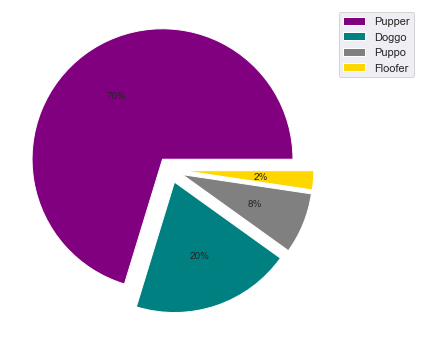

In [63]:
plt.figure(figsize = (6,6))

colors =["purple", "teal", "grey", "gold"]


explode = (0.1,0.1,0.1,0.1)
plt.pie(dog_stages, explode=explode, autopct = "%.f%%", colors = colors)
plt.legend(['Pupper', 'Doggo', 'Puppo', 'Floofer'], bbox_to_anchor =(1,1))

plt.show()

**Most of the dogs found in the database belong to the pupper category.**

## Favorite Tweets and Retweets Over Time

In [64]:
fav_count = df.groupby(['timestamp']).favorite_count.mean()
retweet_count = df.groupby(['timestamp']).retweet_count.mean()

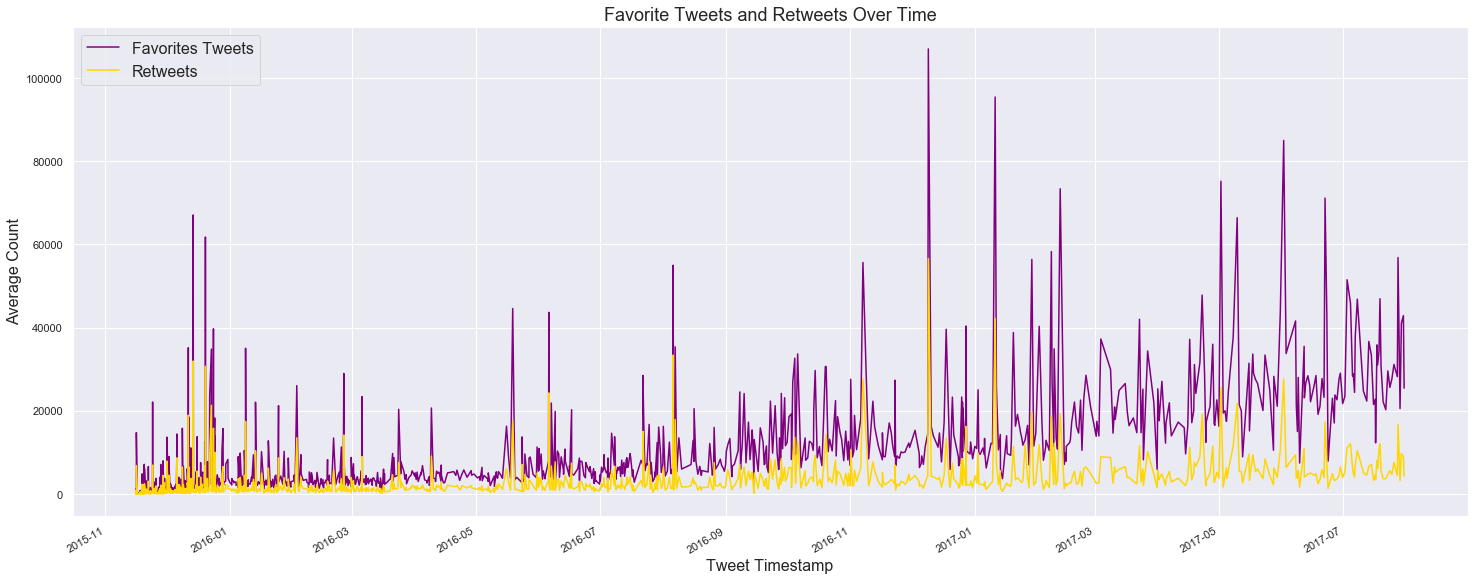

In [65]:
plt.figure(figsize = (25,10))
fav_count.plot(kind='line', color = 'purple', label = "Favorites Tweets")
retweet_count.plot(kind='line', color = 'gold', label = "Retweets")

plt.legend(loc='upper left', fontsize = 16)
plt.xlabel('Tweet Timestamp', fontsize =16)
plt.ylabel('Average Count', fontsize = 16)
plt.title('Favorite Tweets and Retweets Over Time', fontsize =18)
plt.show()



## Frequently Occuring Words in Text Descriptions

In [66]:
from os import path
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [67]:
text = df.text[0]

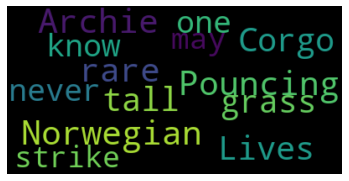

In [68]:
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [69]:
stopwords = set(STOPWORDS)
stopwords.update(['may', 'one', 'never', 'Lives', 'grass', 'know'])

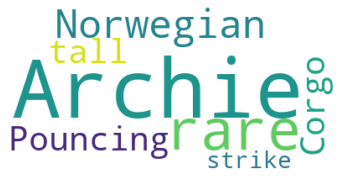

In [70]:
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**The wordcloud does not provide very meaningful insights into the text descriptions.**

# Identifying the Most Retweeted and Most Favorited Dog

In [71]:
most_favorited = df.sort_values('favorite_count', ascending = False).head(1)

In [76]:
most_retweeted = df.sort_values('retweet_count', ascending = False).head(1)

In [77]:
most_retweeted

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage,jpg_url,img_num,dog_breeds,retweet_count,favorite_count
270,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,56625,107015


In [72]:
most_favorited

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage,jpg_url,img_num,dog_breeds,retweet_count,favorite_count
270,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,56625,107015


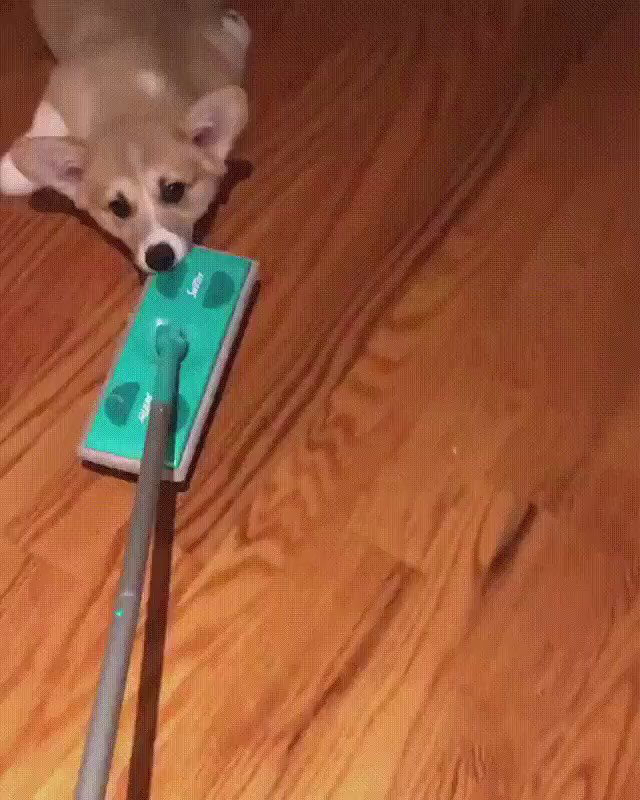

In [73]:
import requests
from PIL import Image
from io import BytesIO


#getting the image of the most favorited dog
url = most_favorited.jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

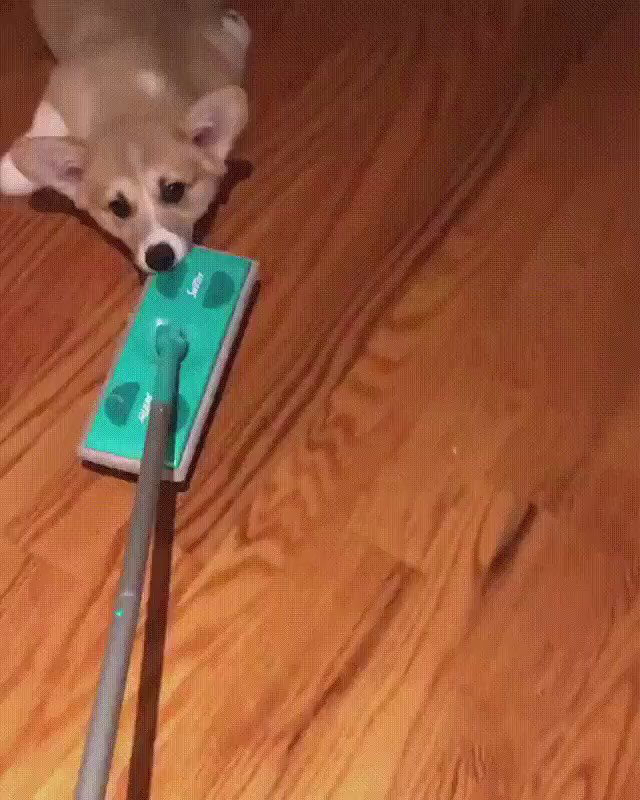

In [78]:
#getting the image of the most retweeted about dog
url = most_retweeted.jpg_url.iloc[0]
response = requests.get(url)
Image.open(BytesIO(response.content))

***The picture shows Stephan, the most favorited and retweeted about dog.***